<Axes: >

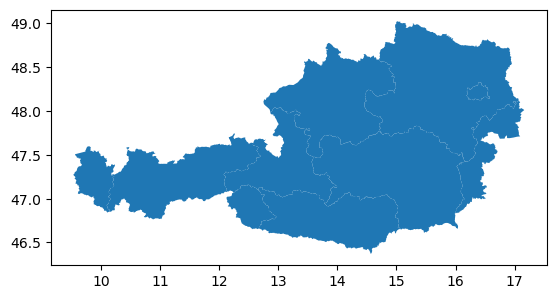

In [ ]:
import geopandas as gpd

source = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgadm&files=gadm_410-levels-ADM_1-AUT.gpkg" 

regions = gpd.read_file(source) #reading in the source 
regions = regions.set_index("GID_1")

regions.plot()

In [2]:
regions.head(10) #checking how the data looks like 

,GID_0,COUNTRY,NAME_1,geometry
GID_1,,,,
AUT.1_1,AUT,Austria,Burgenland,"MULTIPOLYGON (((16.06708 46.84898, 16.06715 46..."
AUT.2_1,AUT,Austria,Kärnten,"MULTIPOLYGON (((14.43536 46.44339, 14.43537 46..."
AUT.3_1,AUT,Austria,Niederösterreich,"MULTIPOLYGON (((16.25377 47.44783, 16.25377 47..."
AUT.4_1,AUT,Austria,Oberösterreich,"MULTIPOLYGON (((13.70853 47.5804, 13.71036 47...."
AUT.5_1,AUT,Austria,Salzburg,"MULTIPOLYGON (((13.69971 47.00418, 13.69947 47..."
AUT.6_1,AUT,Austria,Steiermark,"MULTIPOLYGON (((15.52438 46.62453, 15.52435 46..."
AUT.7_1,AUT,Austria,Tirol,"MULTIPOLYGON (((10.62411 46.86447, 10.62405 46..."
AUT.8_1,AUT,Austria,Vorarlberg,"MULTIPOLYGON (((10.12938 47.02719, 10.12959 47..."
AUT.9_1,AUT,Austria,Wien,"MULTIPOLYGON (((16.29905 48.12999, 16.29897 48..."


In [3]:
#adding attributes to the dataframe for aggregating the geometries to 5 regions therefore mapping the new Region names to the NAME_1 entries
new_regions = {
    "Wien": "Wien",
    "Niederösterreich": "Niederösterreich/Burgenland",
    "Burgenland": "Niederösterreich/Burgenland",
    "Oberösterreich": "Oberösterreich/Salzburg",
    "Salzburg": "Oberösterreich/Salzburg",
    "Tirol": "Tirol/Vorarlberg",
    "Vorarlberg": "Tirol/Vorarlberg",
    "Kärnten": "Kärnten/Steiermark",
    "Steiermark": "Kärnten/Steiermark"
}

regions["region_5"] = regions["NAME_1"].map(new_regions)

#now dissolving the geometries on "region_5" regions
regions_5 = regions.dissolve(by="region_5")


<Axes: >

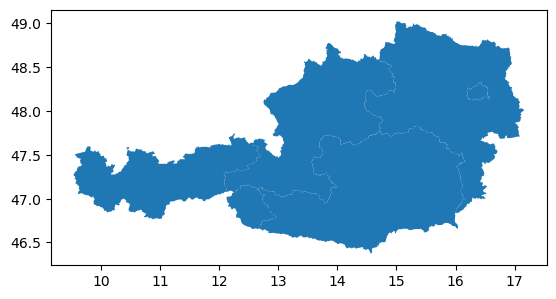

In [4]:
#checking the new region
regions_5.plot()

,geometry,GID_0,COUNTRY,REP_POINT
region_5,,,,
Kärnten/Steiermark,"POLYGON ((14.43537 46.44343, 14.43537 46.44345...",AUT,Austria,POINT (14.98609 47.10053)
Niederösterreich/Burgenland,"POLYGON ((16.06715 46.84889, 16.0672 46.84884,...",AUT,Austria,POINT (15.92138 47.92607)
Oberösterreich/Salzburg,"POLYGON ((13.69947 47.00479, 13.69858 47.00534...",AUT,Austria,POINT (13.86111 47.85873)
Tirol/Vorarlberg,"MULTIPOLYGON (((12.39612 46.71143, 12.39598 46...",AUT,Austria,POINT (10.82959 47.25349)
Wien,"POLYGON ((16.29905 48.12999, 16.29897 48.12999...",AUT,Austria,POINT (16.37248 48.2208)


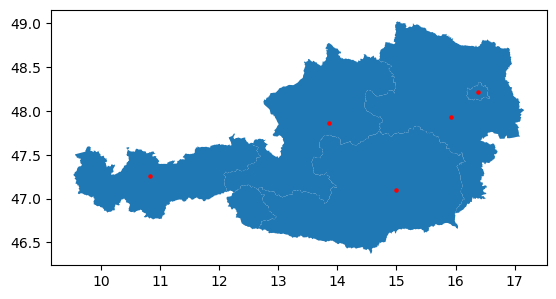

In [5]:
#adding representative points
regions_5["REP_POINT"] = regions_5.representative_point()

#checking the points
ax = regions_5.plot()
regions_5["REP_POINT"].plot(ax=ax, color="red", markersize =5)

#for later use searching looking on the final dataframe and removing NAME_1 because it is no longer needed
regions_5 = regions_5.drop("NAME_1", axis="columns")
regions_5

In [ ]:
#Part 2 Renewable Potentials 
#First: Land eligibility analysis 
#